In [3007]:
!pip install pandas

In [3008]:
import pandas as pd
import numpy as np
import warnings
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.models import ColorBar, LinearColorMapper
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.palettes import Blues256
import pandas as pd
from matplotlib.colors import LogNorm
warnings.filterwarnings("ignore")

In [3009]:
hdi = pd.read_csv("hdi.csv", sep=',')
hdi.head()

,"country,""HdiTier"",""Hdi2022"",""Hdi2021"",""Hdi2020"",""Hdi2019"",""Hdi2010"",""Hdi2000"",""Hdi1990"""
0,"India,""Medium"",0.644,0.633,0.638,0.638,0.572,0..."
1,"China,""High"",0.788,0.785,0.781,0.775,0.698,0.5..."
2,"United States,""Very High"",0.927,0.921,0.923,0...."
3,"Indonesia,""High"",0.713,0.707,0.712,0.718,0.667..."
4,"Pakistan,""Low"",0.54,0.537,0.536,0.537,0.496,0...."


In [3010]:
hdi = pd.read_csv("hdi.csv", sep=',', on_bad_lines='skip')
hdi.head()

,"country,""HdiTier"",""Hdi2022"",""Hdi2021"",""Hdi2020"",""Hdi2019"",""Hdi2010"",""Hdi2000"",""Hdi1990"""
0,"India,""Medium"",0.644,0.633,0.638,0.638,0.572,0..."
1,"China,""High"",0.788,0.785,0.781,0.775,0.698,0.5..."
2,"United States,""Very High"",0.927,0.921,0.923,0...."
3,"Indonesia,""High"",0.713,0.707,0.712,0.718,0.667..."
4,"Pakistan,""Low"",0.54,0.537,0.536,0.537,0.496,0...."


In [3011]:
hdi = pd.read_csv("hdi.csv", sep=',',on_bad_lines='skip', header=None)
hdi = hdi[0].str.split(',', expand=True)
hdi.head()

,0,1,2,3,4,5,6,7,8
0,country,"""HdiTier""","""Hdi2022""","""Hdi2021""","""Hdi2020""","""Hdi2019""","""Hdi2010""","""Hdi2000""","""Hdi1990"""
1,India,"""Medium""",0.644,0.633,0.638,0.638,0.572,0.49,0.434
2,China,"""High""",0.788,0.785,0.781,0.775,0.698,0.586,0.482
3,United States,"""Very High""",0.927,0.921,0.923,0.933,0.916,0.894,0.875
4,Indonesia,"""High""",0.713,0.707,0.712,0.718,0.667,0.597,0.526


In [3012]:
hdi.columns = ["Country", "HdiTier", "Hdi2022", "Hdi2021", "Hdi2020", "Hdi2019", "Hdi2010", "Hdi2000", "Hdi1990"]
hdi.head()

,Country,HdiTier,Hdi2022,Hdi2021,Hdi2020,Hdi2019,Hdi2010,Hdi2000,Hdi1990
0,country,"""HdiTier""","""Hdi2022""","""Hdi2021""","""Hdi2020""","""Hdi2019""","""Hdi2010""","""Hdi2000""","""Hdi1990"""
1,India,"""Medium""",0.644,0.633,0.638,0.638,0.572,0.49,0.434
2,China,"""High""",0.788,0.785,0.781,0.775,0.698,0.586,0.482
3,United States,"""Very High""",0.927,0.921,0.923,0.933,0.916,0.894,0.875
4,Indonesia,"""High""",0.713,0.707,0.712,0.718,0.667,0.597,0.526


In [3013]:
print(hdi.columns)

Index(['Country', 'HdiTier', 'Hdi2022', 'Hdi2021', 'Hdi2020', 'Hdi2019',
       'Hdi2010', 'Hdi2000', 'Hdi1990'],
      dtype='object')


In [3014]:
hdi.drop(columns=["HdiTier", "Hdi2021", "Hdi2020", "Hdi2019", "Hdi2010", "Hdi2000", "Hdi1990"], inplace=True)

In [3015]:
hdi.head()

,Country,Hdi2022
0,country,"""Hdi2022"""
1,India,0.644
2,China,0.788
3,United States,0.927
4,Indonesia,0.713


In [3016]:
hdi = hdi.rename(columns={"Hdi2022": "Hdi"})
hdi.head()

,Country,Hdi
0,country,"""Hdi2022"""
1,India,0.644
2,China,0.788
3,United States,0.927
4,Indonesia,0.713


In [3017]:
hdi.reset_index(drop=True, inplace=True)

In [3018]:
hdi = hdi.drop(0, axis=0)
hdi.head()

,Country,Hdi
1,India,0.644
2,China,0.788
3,United States,0.927
4,Indonesia,0.713
5,Pakistan,0.54


In [3019]:
gini = pd.read_csv("gini.csv", sep=',')
gini.head()

,Entity,Code,Year,Gini coefficient,990179-annotations,World regions according to OWID,time,time.1
0,Afghanistan,AFG,2023,NaN,NaN,Asia,2023,2023
1,Aland Islands,ALA,2023,NaN,NaN,Europe,2023,2023
2,Albania,ALB,2023,0.294196,NaN,Europe,2023,2020
3,Algeria,DZA,2023,NaN,NaN,Africa,2023,2023
4,American Samoa,ASM,2023,NaN,NaN,Oceania,2023,2023


In [3020]:
gini.tail()

,Entity,Code,Year,Gini coefficient,990179-annotations,World regions according to OWID,time,time.1
266,Yemen Arab Republic,OWID_YAR,2023,NaN,NaN,Asia,2023,2023
267,Yemen People's Republic,OWID_YPR,2023,NaN,NaN,Asia,2023,2023
268,Yugoslavia,OWID_YGS,2023,NaN,NaN,Europe,2023,2023
269,Zambia,ZMB,2023,0.514831,NaN,Africa,2023,2022
270,Zimbabwe,ZWE,2023,0.502564,NaN,Africa,2023,2019


In [3021]:
gini = gini.rename(columns={"Entity": "Country"})
gini.head()

,Country,Code,Year,Gini coefficient,990179-annotations,World regions according to OWID,time,time.1
0,Afghanistan,AFG,2023,NaN,NaN,Asia,2023,2023
1,Aland Islands,ALA,2023,NaN,NaN,Europe,2023,2023
2,Albania,ALB,2023,0.294196,NaN,Europe,2023,2020
3,Algeria,DZA,2023,NaN,NaN,Africa,2023,2023
4,American Samoa,ASM,2023,NaN,NaN,Oceania,2023,2023


In [3022]:
gini = gini[["Country", "Gini coefficient"]] 

In [3023]:
gini.head()

,Country,Gini coefficient
0,Afghanistan,NaN
1,Aland Islands,NaN
2,Albania,0.294196
3,Algeria,NaN
4,American Samoa,NaN


In [3024]:
gdp = pd.read_csv("gdp.csv", sep = ';')
gdp.head()

,"GDP per capita, current prices\n (U.S. dollars per capita)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"516,664","356,063","352,456","410,933",no data,no data,no data,no data,no data,no data
2,Albania,"728,359","817,734","824,542","815,529","788,332","788,801","855,724","832,245","805,046",...,"5353,303","6396,166","6870,21","8299,278","9598,191","10386,312","11211,431","11937,672","12713,803","13543,306"
3,Algeria,"2462,085","2502,13","2446,588","2514,256","2640,191","2988,545","2929,092","2935,816","2326,571",...,"3757,585","4169,984","4981,822","5221,813","5579,128","5592,852","5645,511","5680,587","5705,771","5733,606"
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"36973,845","41806,876","41378,881","43809,726","45278,52","45994,879","46819,401","47330,444","47873,433","48458,183"


In [3025]:
gdp.tail()

,"GDP per capita, current prices\n (U.S. dollars per capita)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
226,Other advanced economies,"6900,178","6946,458","6811,908","6722,114","6973,903","6888,013","8320,418","10143,292","11840,737",...,"43282,452","50387,403","50255,43","50406,267","51720,64","53808,555","55915,057","57959,752","60057,918","62130,81"
227,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"1601,096","1757,43","1833,624","1708,163","1576,76","1583,074","1660,201","1726,357","1800,714","1871,006"
228,World,"2867,257","2883,738","2779,713","2805,047","2855,367","2929,08","3386,477","3830,68","4234,565",...,"11125,66","12566,112","12975,982","13400,107","13898,443","14450,241","15038,841","15619,523","16230,797","16845,806"
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,"©IMF, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3026]:
gdp = gdp[["GDP per capita, current prices\n (U.S. dollars per capita)", "2023"]] 

In [3027]:
gdp.head()

,"GDP per capita, current prices\n (U.S. dollars per capita)",2023
0,NaN,NaN
1,Afghanistan,"410,933"
2,Albania,"8299,278"
3,Algeria,"5221,813"
4,Andorra,"43809,726"


In [3028]:
gdp = gdp.rename(columns={"GDP per capita, current prices\n (U.S. dollars per capita)": "Country"})
gdp.head()

,Country,2023
0,NaN,NaN
1,Afghanistan,"410,933"
2,Albania,"8299,278"
3,Algeria,"5221,813"
4,Andorra,"43809,726"


In [3029]:
gdp.reset_index(drop=True, inplace=True)

In [3030]:
gdp = gdp.drop(0, axis=0)
gdp.head()

,Country,2023
1,Afghanistan,"410,933"
2,Albania,"8299,278"
3,Algeria,"5221,813"
4,Andorra,"43809,726"
5,Angola,"2967,384"


In [3031]:
gdp.tail()

,Country,2023
226,Other advanced economies,"50406,267"
227,Sub-Saharan Africa,"1708,163"
228,World,"13400,107"
229,NaN,NaN
230,"©IMF, 2024",NaN


In [3032]:
gdp = gdp.iloc[:196]

In [3033]:
gdp.tail()

,Country,2023
192,Vietnam,"4324,049"
193,West Bank and Gaza,"3180,667"
194,Yemen,"551,953"
195,Zambia,"1369,129"
196,Zimbabwe,"2119,318"


In [3034]:
missing_2023 = gdp[gdp['2023'].isna() | (gdp['2023'] == '')]

# Sonuçları göster
print(missing_2023)

Empty DataFrame
Columns: [Country, 2023]
Index: []


In [3035]:
missing_2023 = gdp[gdp['2023'] == 'no data']

print(missing_2023)

       Country     2023
55     Eritrea  no data
164  Sri Lanka  no data
169      Syria  no data


In [3036]:
gdp['2023'] = gdp['2023'].replace('no data', pd.NA)

missing_2023 = gdp[gdp['2023'].isna()]

print(missing_2023)

       Country  2023
55     Eritrea  <NA>
164  Sri Lanka  <NA>
169      Syria  <NA>


In [3037]:
with open('paris24.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [3038]:
pm = pd.read_csv('paris24.csv', encoding='Windows-1252', sep=';')
pm.head()

,country,Bronze,Silver,Gold
0,United States of America,42,44,40
1,People's Republic of China,24,27,40
2,Great Britain,29,22,14
3,France,22,26,16
4,Australia,16,19,18


In [3039]:
pm['Total Medals'] = pm['Bronze'] + pm['Silver'] + pm['Gold']

print(pm)

                       country  Bronze  Silver  Gold  Total Medals
0     United States of America      42      44    40           126
1   People's Republic of China      24      27    40            91
2                Great Britain      29      22    14            65
3                       France      22      26    16            64
4                    Australia      16      19    18            53
..                         ...     ...     ...   ...           ...
86                        Peru       1       0     0             1
87                       Qatar       1       0     0             1
88                   Singapore       1       0     0             1
89                    Slovakia       1       0     0             1
90                      Zambia       1       0     0             1

[91 rows x 5 columns]


In [3040]:
pm = pm[["country", "Total Medals"]] 
print(pm)

                       country  Total Medals
0     United States of America           126
1   People's Republic of China            91
2                Great Britain            65
3                       France            64
4                    Australia            53
..                         ...           ...
86                        Peru             1
87                       Qatar             1
88                   Singapore             1
89                    Slovakia             1
90                      Zambia             1

[91 rows x 2 columns]


In [3041]:
pm = pm.rename(columns={"country": "Country"})
pm.head()

,Country,Total Medals
0,United States of America,126
1,People's Republic of China,91
2,Great Britain,65
3,France,64
4,Australia,53


In [3042]:
gdp_countries = set(gdp['Country'].unique())
pm_countries = set(pm['Country'].unique())
gini_countries = set(gini['Country'].unique())
hdi_countries = set(hdi['Country'].unique())

all_countries = gdp_countries.union(pm_countries, gini_countries, hdi_countries)

print("All unique countries:")
for country in sorted(all_countries):
    print(country)

All unique countries:
Afghanistan
Aland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Austria-Hungary
Azerbaijan
Bahamas
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
China, People's Republic of
Chinese Taipei
Christmas Island
Cocos Islands
Colombia
Comoros
Congo
Congo, Dem. Rep. of the
Congo, Republic of 
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Czechia
Czechoslovakia
Côte d'Ivoire
C™te d'Ivoire
DR Congo
Democratic People's Republic of Korea
Democratic Republic of Congo
Democratic Republic of Vietnam
Denmark
Djibouti
Dominica
Dominican Republi

In [3043]:
gdp_countries = set(gdp['Country'].unique())
print("Unique countries in GDP dataset:")
for country in sorted(gdp_countries):
    print(country)

Unique countries in GDP dataset:
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China, People's Republic of
Colombia
Comoros
Congo, Dem. Rep. of the
Congo, Republic of 
Costa Rica
Croatia
Cyprus
Czech Republic
Côte d'Ivoire
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, Republic of
Kosovo
Kuwait
Kyrgyz Republic
Lao P.D.R.
Latvia
Lebanon
Lesotho
Liber

In [3044]:
gini_countries = set(gini['Country'].unique())
print("Unique countries in GINI dataset:")
for country in sorted(gini_countries):
    print(country)

Unique countries in GINI dataset:
Afghanistan
Aland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Austria-Hungary
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Cocos Islands
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Democratic Republic of Vietnam
Denmark
Djibouti
Dominica
Dominican Republic
Duchy of Modena and Reggio
Duchy of Parma and Piacenza
East Germany
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Ethiopia (former)
Falkland Islands
Faroe Islands

In [3045]:
gini[gini['Country'] == 'USSR']

,Country,Gini coefficient
249,USSR,NaN


In [3046]:
exclude_countries = [
    "Austria-Hungary",
    "Ethiopia (former)",
    "Korea (former)",
    "Pakistan (former)",
    "Serbia and Montenegro",
    "USSR",
    "Yemen Arab Republic",
    "Yemen People's Republic",
    "Yugoslavia",
    "East Germany",
    "West Germany"
]

gini = gini[~gini['Country'].isin(exclude_countries)]

print("GINI dataset after removing specified countries:")
print(gini)

GINI dataset after removing specified countries:
               Country  Gini coefficient
0          Afghanistan               NaN
1        Aland Islands               NaN
2              Albania          0.294196
3              Algeria               NaN
4       American Samoa               NaN
..                 ...               ...
262  Wallis and Futuna               NaN
264     Western Sahara               NaN
265              Yemen               NaN
269             Zambia          0.514831
270           Zimbabwe          0.502564

[260 rows x 2 columns]


In [3047]:
gini_countries = set(gini['Country'].unique())
print("Unique countries in GINI dataset:")
for country in sorted(gini_countries):
    print(country)

Unique countries in GINI dataset:
Afghanistan
Aland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Cocos Islands
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Democratic Republic of Vietnam
Denmark
Djibouti
Dominica
Dominican Republic
Duchy of Modena and Reggio
Duchy of Parma and Piacenza
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands
Faroe Islands
Federal Republic of Central America
Fiji
Finla

In [3048]:
hdi_countries = set(hdi['Country'].unique())
print("Unique countries in HDI dataset:")
for country in sorted(hdi_countries):
    print(country)

Unique countries in HDI dataset:
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Colombia
Comoros
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
DR Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mau

In [3049]:
pm_countries = set(pm['Country'].unique())
print("Unique countries in PM dataset:")
for country in sorted(pm_countries):
    print(country)

Unique countries in PM dataset:
Albania
Algeria
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Belgium
Botswana
Brazil
Bulgaria
Cabo Verde
Canada
Chile
Chinese Taipei
Colombia
Croatia
Cuba
Cyprus
Czechia
C™te d'Ivoire
Democratic People's Republic of Korea
Denmark
Dominica
Dominican Republic
Ecuador
Egypt
Ethiopia
Fiji
France
Georgia
Germany
Great Britain
Greece
Grenada
Guatemala
Hong Kong, China
Hungary
India
Indonesia
Ireland
Islamic Republic of Iran
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kyrgyzstan
Lithuania
Malaysia
Mexico
Mongolia
Morocco
Netherlands
New Zealand
Norway
Pakistan
Panama
People's Republic of China
Peru
Philippines
Poland
Portugal
Puerto Rico
Qatar
Refugee Olympic Team
Republic of Korea
Republic of Moldova
Romania
Saint Lucia
Serbia
Singapore
Slovakia
Slovenia
South Africa
Spain
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United States of America
Uzbekistan
Zambia


In [3050]:
existing_countries = set(pm['Country'].unique())

In [3051]:
paris_2024_countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda",
    "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas",
    "Bahrain", "Bangladesh", "Barbados", "Belgium", "Belize", "Benin", "Bhutan",
    "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Chinese Taipei",
    "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus",
    "Czechia", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador",
    "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini",
    "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany",
    "Ghana", "Great Britain", "Greece", "Grenada", "Guatemala", "Guinea",
    "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong", "Hungary", "Iceland",
    "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Ivory Coast",
    "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea",
    "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar",
    "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands",
    "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru",
    "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea",
    "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico", "Qatar",
    "Refugee Olympic Team", "Republic of Korea", "Republic of Moldova", "Romania",
    "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia",
    "Solomon Islands", "Somalia", "South Africa", "South Korea", "South Sudan",
    "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria",
    "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga",
    "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda",
    "Ukraine", "United Arab Emirates", "United States of America", "Uruguay",
    "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Zambia",
    "Zimbabwe"
]

In [3052]:
missing_countries = set(paris_2024_countries) - existing_countries

missing_countries_df = pd.DataFrame({
    "Country": list(missing_countries),
    "Total Medals": 0
})

updated_pm = pd.concat([pm, missing_countries_df], ignore_index=True)

In [3053]:
print("Countries added to the dataset:")
print(missing_countries_df)

Countries added to the dataset:
           Country  Total Medals
0           Angola             0
1          Somalia             0
2            Benin             0
3           Kuwait             0
4    Liechtenstein             0
..             ...           ...
108      Venezuela             0
109        Uruguay             0
110   Turkmenistan             0
111     Montenegro             0
112          Haiti             0

[113 rows x 2 columns]


In [3054]:
print("Updated PM dataset:")
print(updated_pm)

Updated PM dataset:
                        Country  Total Medals
0      United States of America           126
1    People's Republic of China            91
2                 Great Britain            65
3                        France            64
4                     Australia            53
..                          ...           ...
199                   Venezuela             0
200                     Uruguay             0
201                Turkmenistan             0
202                  Montenegro             0
203                       Haiti             0

[204 rows x 2 columns]


In [3055]:
all_countries = set(gdp['Country'].unique()).union(
    set(updated_pm['Country'].unique()),  # Güncellenmiş PM datasetini kullanıyoruz
    set(gini['Country'].unique()),
    set(hdi['Country'].unique())
)

for country in sorted(all_countries):
    print(country)

Afghanistan
Aland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
China, People's Republic of
Chinese Taipei
Christmas Island
Cocos Islands
Colombia
Comoros
Congo
Congo, Dem. Rep. of the
Congo, Republic of 
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Czechia
Czechoslovakia
Côte d'Ivoire
C™te d'Ivoire
DR Congo
Democratic People's Republic of Korea
Democratic Republic of Congo
Democratic Republic of Vietnam
Denmark
Djibouti
Dominica
Dominican Republic
Duchy of Modena and Reggio
Duchy of 

In [3056]:
country_mapping = {
    # Aynı ülkenin farklı yazımları
    "United States of America": "USA",
    "United States": "USA",
    "United States Virgin Islands": "USA Virgin Islands",
    "Bahamas, The": "Bahamas",
    "Gambia, The": "The Gambia",
    "People's Republic of China": "China",
    "China, People's Republic of": "China",
    "Hong Kong": "Hong Kong SAR",
    "Hong Kong SAR": "Hong Kong SAR",
    "Hong Kong, China": "Hong Kong SAR",
    "United Kingdom": "United Kingdom",
    "Great Britain": "United Kingdom",
    "Ivory Coast": "Côte d'Ivoire",
    "Côte d'Ivoire": "Côte d'Ivoire",
    "C™te d'Ivoire": "Côte d'Ivoire",
    "North Macedonia ": "North Macedonia",
    "Czech Republic": "Czechia",
    "Czechoslovakia": "Czechia",
    "Slovak Republic": "Slovakia",
    "Lao P.D.R.": "Laos",
    "Taiwan Province of China": "Taiwan",
    "Micronesia (country)": "Micronesia, Fed. States of",
    "Micronesia": "Micronesia, Fed. States of",
    "São Tomé and Príncipe": "Sao Tome and Principe",
    "Cape Verde": "Cabo Verde",
    "Islamic Republic of Iran": "Iran",
    "Republic of Korea": "South Korea",
    "Korea, Republic of": "South Korea",
    "Democratic People's Republic of Korea": "North Korea",
    "Republic of Moldova": "Moldova",
    "Serbia and Montenegro": "Serbia",
    "Sao Tome and Principe": "São Tomé and Príncipe",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Tanzania": "United Republic of Tanzania",
    "Swaziland": "Eswatini",
    "Macao": "Macao SAR",
    "Congo, Republic of ": "Congo",
    "Congo, Dem. Rep. of the": "DR Congo",
    "Democratic Republic of Congo": "DR Congo",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Türkiye, Republic of": "Turkey"
}

In [3057]:
gdp['Country'] = gdp['Country'].replace(country_mapping)
updated_pm['Country'] = updated_pm['Country'].replace(country_mapping)
gini['Country'] = gini['Country'].replace(country_mapping)
hdi['Country'] = hdi['Country'].replace(country_mapping)

In [3058]:
all_countries = set(gdp['Country'].unique()).union(
    set(updated_pm['Country'].unique()),  # Güncellenmiş PM datasetini kullanıyoruz
    set(gini['Country'].unique()),
    set(hdi['Country'].unique())
)

for country in sorted(all_countries):
    print(country)

Afghanistan
Aland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
Chinese Taipei
Christmas Island
Cocos Islands
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Côte d'Ivoire
DR Congo
Democratic Republic of Vietnam
Denmark
Djibouti
Dominica
Dominican Republic
Duchy of Modena and Reggio
Duchy of Parma and Piacenza
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands
Faroe Islands
Federal Republic of Central America
Fiji
Finland
France
French Guian

In [3059]:
country_mapping = {
    "Côte d'Ivoire": "Cote d'Ivoire",
    "South Sudan, Republic of": "South Sudan"
}

gdp['Country'] = gdp['Country'].replace(country_mapping)
updated_pm['Country'] = updated_pm['Country'].replace(country_mapping)
gini['Country'] = gini['Country'].replace(country_mapping)
hdi['Country'] = hdi['Country'].replace(country_mapping)

In [3060]:
all_countries = set(gdp['Country'].unique()).union(
    set(updated_pm['Country'].unique()),  # Güncellenmiş PM datasetini kullanıyoruz
    set(gini['Country'].unique()),
    set(hdi['Country'].unique())
)

for country in sorted(all_countries):
    print(country)
    

Afghanistan
Aland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
Chinese Taipei
Christmas Island
Cocos Islands
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
DR Congo
Democratic Republic of Vietnam
Denmark
Djibouti
Dominica
Dominican Republic
Duchy of Modena and Reggio
Duchy of Parma and Piacenza
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands
Faroe Islands
Federal Republic of Central America
Fiji
Finland
France
French Guiana
French Polyn

In [3061]:
from functools import reduce


datasets = [updated_pm, gini, gdp, hdi]


merged_data = reduce(lambda left, right: pd.merge(left, right, on='Country', how='outer'), datasets)


print("Merged dataset:")
print(merged_data.head())



Merged dataset:
          Country  Total Medals  Gini coefficient      2023    Hdi
0     Afghanistan           0.0               NaN   410,933  0.462
1   Aland Islands           NaN               NaN       NaN    NaN
2         Albania           2.0          0.294196  8299,278  0.789
3         Algeria           3.0               NaN  5221,813  0.745
4  American Samoa           NaN               NaN       NaN    NaN


In [3062]:
merged_data.tail()

,Country,Total Medals,Gini coefficient,2023,Hdi
271,West Bank and Gaza,NaN,NaN,"3180,667",NaN
272,Western Sahara,NaN,NaN,NaN,NaN
273,Yemen,NaN,NaN,"551,953",0.424
274,Zambia,1.0,0.514831,"1369,129",0.569
275,Zimbabwe,0.0,0.502564,"2119,318",0.55


In [3063]:
pm_countries = set(updated_pm['Country'])

filtered_datasets = [
    df[df['Country'].isin(pm_countries)] for df in [gini, gdp, hdi]
]

from functools import reduce
md = reduce(lambda left, right: pd.merge(left, right, on='Country', how='outer'), [updated_pm] + filtered_datasets)

print("Filtered and merged dataset:")
print(md.head())

Filtered and merged dataset:
       Country  Total Medals  Gini coefficient       2023    Hdi
0  Afghanistan             0               NaN    410,933  0.462
1      Albania             2          0.294196   8299,278  0.789
2      Algeria             3               NaN   5221,813  0.745
3      Andorra             0               NaN  43809,726  0.884
4       Angola             0          0.512640   2967,384  0.591


In [3064]:
md.tail()

,Country,Total Medals,Gini coefficient,2023,Hdi
200,Vatican City,0,NaN,NaN,NaN
201,Venezuela,0,NaN,"3737,81",0.699
202,Vietnam,0,0.360930,"4324,049",0.726
203,Zambia,1,0.514831,"1369,129",0.569
204,Zimbabwe,0,0.502564,"2119,318",0.55


In [3065]:
md = md.rename(columns={"2023": "Gdp"})
md.head()

,Country,Total Medals,Gini coefficient,Gdp,Hdi
0,Afghanistan,0,NaN,"410,933",0.462
1,Albania,2,0.294196,"8299,278",0.789
2,Algeria,3,NaN,"5221,813",0.745
3,Andorra,0,NaN,"43809,726",0.884
4,Angola,0,0.512640,"2967,384",0.591


In [3066]:
md = md.rename(columns={"Gini coefficient": "Gini"})
md.head()
md.tail()

,Country,Total Medals,Gini,Gdp,Hdi
200,Vatican City,0,NaN,NaN,NaN
201,Venezuela,0,NaN,"3737,81",0.699
202,Vietnam,0,0.360930,"4324,049",0.726
203,Zambia,1,0.514831,"1369,129",0.569
204,Zimbabwe,0,0.502564,"2119,318",0.55


In [3067]:
missing_gdp_hdi_gini = md[
    md[['Gdp', 'Hdi', 'Gini']].isnull().all(axis=1)
]

print(missing_gdp_hdi_gini)

                  Country  Total Medals  Gini  Gdp  Hdi
36         Chinese Taipei             7   NaN  NaN  NaN
94                  Korea             0   NaN  NaN  NaN
120                Monaco             0   NaN  NaN  NaN
134           North Korea             6   NaN  NaN  NaN
150  Refugee Olympic Team             1   NaN  NaN  NaN
200          Vatican City             0   NaN  NaN  NaN


In [3068]:
region_mapping = {
    # Asia
    "Afghanistan": "Asia",
    "Armenia": "Asia",
    "Azerbaijan": "Asia",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Bhutan": "Asia",
    "Brunei": "Asia",
    "Cambodia": "Asia",
    "China": "Asia",
    "Cyprus": "Asia",
    "Georgia": "Asia",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Israel": "Asia",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Lebanon": "Asia",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mongolia": "Asia",
    "Myanmar": "Asia",
    "Nepal": "Asia",
    "North Korea": "Asia",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palestine": "Asia",
    "Philippines": "Asia",
    "Qatar": "Asia",
    "Saudi Arabia": "Asia",
    "Singapore": "Asia",
    "South Korea": "Asia",
    "Sri Lanka": "Asia",
    "Syria": "Asia",
    "Tajikistan": "Asia",
    "Thailand": "Asia",
    "Timor-Leste": "Asia",
    "Turkmenistan": "Asia",
    "United Arab Emirates": "Asia",
    "Uzbekistan": "Asia",
    "Vietnam": "Asia",
    "Yemen": "Asia",

    # Europe
    "Albania": "Europe",
    "Andorra": "Europe",
    "Austria": "Europe",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Bosnia and Herzegovina": "Europe",
    "Bulgaria": "Europe",
    "Croatia": "Europe",
    "Cyprus": "Europe",
    "Czechia": "Europe",
    "Denmark": "Europe",
    "Estonia": "Europe",
    "Finland": "Europe",
    "France": "Europe",
    "Germany": "Europe",
    "Greece": "Europe",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "Ireland": "Europe",
    "Italy": "Europe",
    "Kosovo": "Europe",
    "Latvia": "Europe",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Malta": "Europe",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Montenegro": "Europe",
    "Netherlands": "Europe",
    "North Macedonia": "Europe",
    "Norway": "Europe",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Romania": "Europe",
    "San Marino": "Europe",
    "Serbia": "Europe",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Spain": "Europe",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Turkey": "Europe",
    "Ukraine": "Europe",
    "United Kingdom": "Europe",
    "Vatican": "Europe",

    # Africa
    "Algeria": "Africa",
    "Angola": "Africa",
    "Benin": "Africa",
    "Botswana": "Africa",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cabo Verde": "Africa",
    "Cameroon": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Comoros": "Africa",
    "Congo": "Africa",
    "Cote d'Ivoire": "Africa",
    "Djibouti": "Africa",
    "Egypt": "Africa",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Ghana": "Africa",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Kenya": "Africa",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Mali": "Africa",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Namibia": "Africa",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "Rwanda": "Africa",
    "Sao Tome and Principe": "Africa",
    "Senegal": "Africa",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Sudan": "Africa",
    "Sudan": "Africa",
    "Tanzania": "Africa",
    "Togo": "Africa",
    "Tunisia": "Africa",
    "Uganda": "Africa",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",

    # North America
    "Antigua and Barbuda": "North America",
    "Bahamas": "North America",
    "Barbados": "North America",
    "Belize": "North America",
    "Canada": "North America",
    "Costa Rica": "North America",
    "Cuba": "North America",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "El Salvador": "North America",
    "Grenada": "North America",
    "Guatemala": "North America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Jamaica": "North America",
    "Mexico": "North America",
    "Nicaragua": "North America",
    "Panama": "North America",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Trinidad and Tobago": "North America",
    "United States": "North America",

    # South America
    "Argentina": "South America",
    "Bolivia": "South America",
    "Brazil": "South America",
    "Chile": "South America",
    "Colombia": "South America",
    "Ecuador": "South America",
    "Guyana": "South America",
    "Paraguay": "South America",
    "Peru": "South America",
    "Suriname": "South America",
    "Uruguay": "South America",
    "Venezuela": "South America",

    # Oceania
    "Australia": "Oceania",
    "Fiji": "Oceania",
    "Kiribati": "Oceania",
    "Marshall Islands": "Oceania",
    "Micronesia": "Oceania",
    "Nauru": "Oceania",
    "New Zealand": "Oceania",
    "Palau": "Oceania",
    "Papua New Guinea": "Oceania",
    "Samoa": "Oceania",
    "Solomon Islands": "Oceania",
    "Tonga": "Oceania",
    "Tuvalu": "Oceania",
    "Vanuatu": "Oceania"
}

In [3069]:
md['Region'] = md['Country'].map(region_mapping)

regions = md.groupby('Region')['Country'].apply(list)

for region, countries in regions.items():
    print(f"{region}: {', '.join(countries)}")

Africa: Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cabo Verde, Cameroon, Central African Republic, Chad, Comoros, Congo, Cote d'Ivoire, Cote d'Ivoire, Djibouti, Egypt, Equatorial Guinea, Eritrea, Eswatini, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Seychelles, Sierra Leone, Somalia, South Africa, South Sudan, Sudan, Togo, Tunisia, Uganda, Zambia, Zimbabwe
Asia: Afghanistan, Armenia, Azerbaijan, Bahrain, Bangladesh, Bhutan, Brunei, Cambodia, China, China, Georgia, India, Indonesia, Iran, Iran, Iraq, Israel, Japan, Jordan, Kazakhstan, Kuwait, Kyrgyzstan, Laos, Lebanon, Malaysia, Maldives, Mongolia, Myanmar, Nepal, North Korea, Oman, Pakistan, Palestine, Philippines, Qatar, Saudi Arabia, Singapore, South Korea, South Korea, Sri Lanka, Syria, Tajikistan, Thailand, Timor-Leste, Turkmenistan, United Arab Emirates, Uzbekistan

In [3070]:
md.head()

,Country,Total Medals,Gini,Gdp,Hdi,Region
0,Afghanistan,0,NaN,"410,933",0.462,Asia
1,Albania,2,0.294196,"8299,278",0.789,Europe
2,Algeria,3,NaN,"5221,813",0.745,Africa
3,Andorra,0,NaN,"43809,726",0.884,Europe
4,Angola,0,0.512640,"2967,384",0.591,Africa


In [3071]:
# Regionların Gini ortalama ve medyanlarını hesaplama
if 'Region' in md.columns and 'Gini' in md.columns:
    region_gini_stats = md.groupby('Region')['Gini'].agg(['mean', 'median']).reset_index()
    region_gini_stats.rename(columns={'mean': 'Gini Mean', 'median': 'Gini Median'}, inplace=True)

# Sonuçları kontrol etme
print(region_gini_stats)



          Region  Gini Mean  Gini Median
0         Africa   0.382302     0.367576
1           Asia   0.329430     0.331399
2         Europe   0.309730     0.313278
3  North America   0.420812     0.434540
4        Oceania   0.312947     0.315122
5  South America   0.445066     0.430427


In [3072]:
if 'Region' in md.columns and 'Gini' in md.columns:
    md['Gini'] = md.groupby('Region')['Gini'].transform(
        lambda x: x.fillna(x.median())
    )

print(md[['Country', 'Region', 'Gini']].head())


       Country  Region      Gini
0  Afghanistan    Asia  0.331399
1      Albania  Europe  0.294196
2      Algeria  Africa  0.367576
3      Andorra  Europe  0.313278
4       Angola  Africa  0.512640


In [3073]:
md.head

<bound method NDFrame.head of           Country  Total Medals      Gini        Gdp    Hdi         Region
0     Afghanistan             0  0.331399    410,933  0.462           Asia
1         Albania             2  0.294196   8299,278  0.789         Europe
2         Algeria             3  0.367576   5221,813  0.745         Africa
3         Andorra             0  0.313278  43809,726  0.884         Europe
4          Angola             0  0.512640   2967,384  0.591         Africa
..            ...           ...       ...        ...    ...            ...
200  Vatican City             0       NaN        NaN    NaN            NaN
201     Venezuela             0  0.430427    3737,81  0.699  South America
202       Vietnam             0  0.360930   4324,049  0.726           Asia
203        Zambia             1  0.514831   1369,129  0.569         Africa
204      Zimbabwe             0  0.502564   2119,318   0.55         Africa

[205 rows x 6 columns]>

In [3074]:
print(md['Hdi'].dtype)

non_numeric_hdi = md[pd.to_numeric(md['Hdi'], errors='coerce').isna()]
print("Non-numeric Hdi values:")
print(non_numeric_hdi[['Country', 'Hdi']])

object
Non-numeric Hdi values:
                  Country  Hdi
36         Chinese Taipei  NaN
39                  Congo  NaN
94                  Korea  NaN
95                 Kosovo  NaN
120                Monaco  NaN
134           North Korea  NaN
148           Puerto Rico  NaN
150  Refugee Olympic Team  NaN
200          Vatican City  NaN


In [3075]:
md['Hdi'] = pd.to_numeric(md['Hdi'], errors='coerce')

In [3076]:
if 'Region' in md.columns and 'Hdi' in md.columns:
    region_hdi_stats = md.groupby('Region')['Hdi'].agg(['mean', 'median']).reset_index()
    region_hdi_stats.rename(columns={'mean': 'Hdi Mean', 'median': 'Hdi Median'}, inplace=True)

print(region_hdi_stats)


          Region  Hdi Mean  Hdi Median
0         Africa  0.556765       0.540
1           Asia  0.750936       0.760
2         Europe  0.883841       0.895
3  North America  0.752864       0.769
4        Oceania  0.715692       0.702
5  South America  0.762000       0.759


In [3077]:
if 'Region' in md.columns and 'Hdi' in md.columns:
    md['Hdi'] = md.groupby('Region')['Hdi'].transform(
        lambda x: x.fillna(x.median())
    )


In [3078]:
md.head()

,Country,Total Medals,Gini,Gdp,Hdi,Region
0,Afghanistan,0,0.331399,"410,933",0.462,Asia
1,Albania,2,0.294196,"8299,278",0.789,Europe
2,Algeria,3,0.367576,"5221,813",0.745,Africa
3,Andorra,0,0.313278,"43809,726",0.884,Europe
4,Angola,0,0.512640,"2967,384",0.591,Africa


In [3079]:
non_numeric_gdp = md[pd.to_numeric(md['Gdp'], errors='coerce').isna()]
print(non_numeric_gdp[['Country', 'Gdp']])


          Country        Gdp
0     Afghanistan    410,933
1         Albania   8299,278
2         Algeria   5221,813
3         Andorra  43809,726
4          Angola   2967,384
..            ...        ...
200  Vatican City        NaN
201     Venezuela    3737,81
202       Vietnam   4324,049
203        Zambia   1369,129
204      Zimbabwe   2119,318

[204 rows x 2 columns]


In [3080]:
print(md['Gdp'].dtype)

non_numeric_hdi = md[pd.to_numeric(md['Gdp'], errors='coerce').isna()]
print("Non-numeric Gdp values:")
print(non_numeric_hdi[['Country', 'Gdp']])

object
Non-numeric Gdp values:
          Country        Gdp
0     Afghanistan    410,933
1         Albania   8299,278
2         Algeria   5221,813
3         Andorra  43809,726
4          Angola   2967,384
..            ...        ...
200  Vatican City        NaN
201     Venezuela    3737,81
202       Vietnam   4324,049
203        Zambia   1369,129
204      Zimbabwe   2119,318

[204 rows x 2 columns]


In [3081]:
import re


def extract_numeric(value):
    if isinstance(value, str):
        numeric_part = re.sub(r'[^\d.]', '', value)
        try:
            return float(numeric_part) if numeric_part else 0
        except ValueError:
            return 0
    return value

md['Gdp'] = md['Gdp'].apply(extract_numeric)

print(md[['Country', 'Gdp']].head(20))


                Country         Gdp
0           Afghanistan    410933.0
1               Albania   8299278.0
2               Algeria   5221813.0
3               Andorra  43809726.0
4                Angola   2967384.0
5   Antigua and Barbuda  19985469.0
6             Argentina  13823346.0
7               Armenia   8125625.0
8             Australia  64546866.0
9               Austria  56856125.0
10           Azerbaijan   7144807.0
11              Bahamas  35517076.0
12              Bahrain  29218861.0
13           Bangladesh   2651738.0
14             Barbados  23167298.0
15              Belgium  53854213.0
16               Belize   7592071.0
17                Benin   1433067.0
18               Bhutan   3790136.0
19              Bolivia    374841.0


In [3082]:
md['Gdp'] = md['Gdp'] / 1000

In [3083]:
md.head()

,Country,Total Medals,Gini,Gdp,Hdi,Region
0,Afghanistan,0,0.331399,410.933,0.462,Asia
1,Albania,2,0.294196,8299.278,0.789,Europe
2,Algeria,3,0.367576,5221.813,0.745,Africa
3,Andorra,0,0.313278,43809.726,0.884,Europe
4,Angola,0,0.512640,2967.384,0.591,Africa


In [3084]:
region_gdp_stats = md.groupby('Region')['Gdp'].agg(['mean', 'median']).reset_index()
region_gdp_stats.rename(columns={'mean': 'Gdp Mean', 'median': 'Gdp Median'}, inplace=True)


print(region_gdp_stats)

          Region      Gdp Mean  Gdp Median
0         Africa    2790.25954    1472.142
1           Asia  11561.333349    4486.987
2         Europe  36830.083909  30883.9495
3  North America     14512.384   11515.617
4        Oceania  13598.219308    5933.167
5  South America   9824.086667   7437.9145


In [3085]:
if 'Region' in md.columns and 'Gdp' in md.columns:
    md['Gdp'] = md.groupby('Region')['Gdp'].transform(
        lambda x: x.fillna(x.median())
    )

print(md[['Country', 'Region', 'Gdp']].head(20))


                Country         Region        Gdp
0           Afghanistan           Asia    410.933
1               Albania         Europe   8299.278
2               Algeria         Africa   5221.813
3               Andorra         Europe  43809.726
4                Angola         Africa   2967.384
5   Antigua and Barbuda  North America  19985.469
6             Argentina  South America  13823.346
7               Armenia           Asia   8125.625
8             Australia        Oceania  64546.866
9               Austria         Europe  56856.125
10           Azerbaijan           Asia   7144.807
11              Bahamas  North America  35517.076
12              Bahrain           Asia  29218.861
13           Bangladesh           Asia   2651.738
14             Barbados  North America  23167.298
15              Belgium         Europe  53854.213
16               Belize  North America   7592.071
17                Benin         Africa   1433.067
18               Bhutan           Asia   3790.136


In [3086]:
md.head()

,Country,Total Medals,Gini,Gdp,Hdi,Region
0,Afghanistan,0,0.331399,410.933,0.462,Asia
1,Albania,2,0.294196,8299.278,0.789,Europe
2,Algeria,3,0.367576,5221.813,0.745,Africa
3,Andorra,0,0.313278,43809.726,0.884,Europe
4,Angola,0,0.512640,2967.384,0.591,Africa


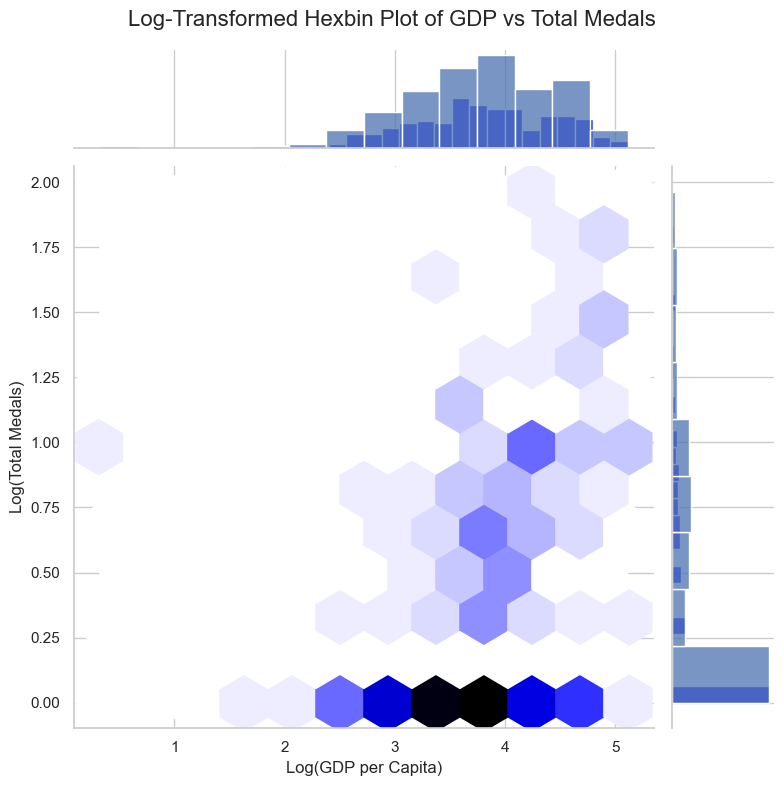

In [3087]:


md['Log_Gdp'] = np.log10(md['Gdp'])
md['Log_Total_Medals'] = np.log10(md['Total Medals'] + 1)

sns.set(style="whitegrid")
joint_plot = sns.jointplot(
    data=md,
    x='Log_Gdp',
    y='Log_Total_Medals',
    kind="hex",
    height=8,
    color="blue",
    marginal_kws=dict(bins=30, fill=True)
)

joint_plot.plot_marginals(sns.histplot, kde=False)
joint_plot.fig.suptitle('Log-Transformed Hexbin Plot of GDP vs Total Medals', fontsize=16)
joint_plot.ax_joint.set_xlabel('Log(GDP per Capita)', fontsize=12)
joint_plot.ax_joint.set_ylabel('Log(Total Medals)', fontsize=12)

plt.tight_layout()
plt.savefig(r"/Users/revhatakdogan/Desktop/421 project/gdp_vs_medals_log_plot.png", dpi=300, bbox_inches="tight")
plt.show()


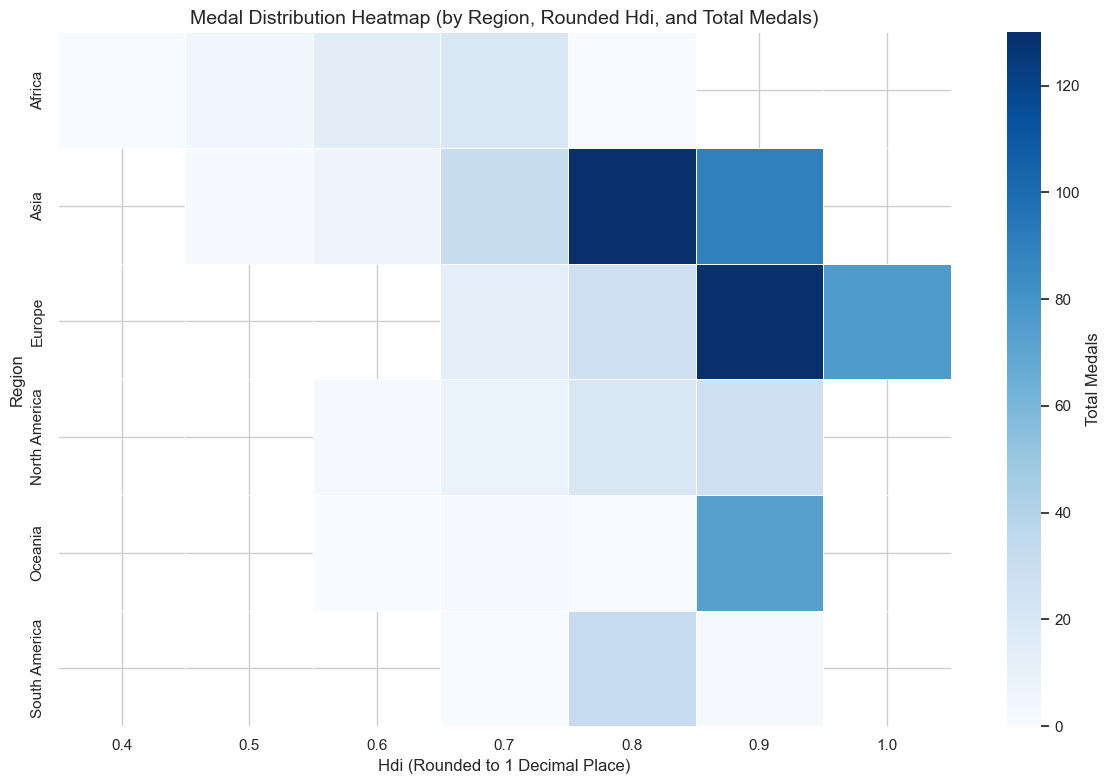

In [3088]:
md['Rounded_Hdi'] = md['Hdi'].round(1) 

# Pivot tabloyu güncelle
heatmap_data = md.pivot_table(
    index='Region',        
    columns='Rounded_Hdi',  
    values='Total Medals',  
    aggfunc='sum'        
)

# Görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=False,           
    cmap="Blues",           
    cbar_kws={'label': 'Total Medals'}, 
    linewidths=0.5,        
    vmax=130               
)


plt.title("Medal Distribution Heatmap (by Region, Rounded Hdi, and Total Medals)", fontsize=14)
plt.xlabel("Hdi (Rounded to 1 Decimal Place)", fontsize=12)
plt.ylabel("Region", fontsize=12)

plt.tight_layout()
plt.savefig(r"/Users/revhatakdogan/Desktop/421 project/hdi_vs_medals_log_plot.png", dpi=300, bbox_inches="tight")  # Dosya olarak kaydet
plt.show() 

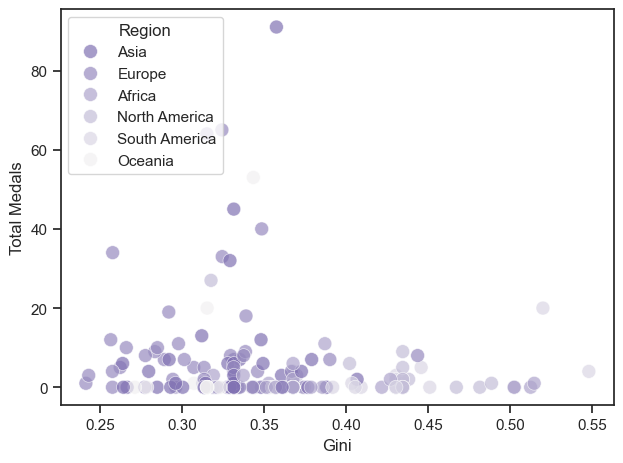

In [3148]:
sns.despine(f)

sns.scatterplot(
    data=md,  # 'md' verisi kullanılıyor
    x="Gini",  # Gini endeksini X eksenine koyuyoruz
    y="Total Medals",  # Total Medals'ı Y eksenine koyuyoruz
    hue="Region",  # Renkler 'Region' sütununa göre olacak
    palette="light:m_r",  # Renk paleti
    edgecolor="w",  # Noktaların çevresine beyaz kenarlık
    linewidth=0.5,  # Kenarlık kalınlığı
    s=100,  # Nokta boyutları
    alpha=0.7  # Noktaların şeffaflığı
)

# Başlık ve etiketler
ax.set_title("Gini vs Total Medals by Region", fontsize=16)
ax.set_xlabel("Gini Index", fontsize=14)
ax.set_ylabel("Total Medals", fontsize=14)

# X ve Y eksenlerini daha uygun yapalım
ax.set_xticks([0.25, 0.4, 0.6])  # Gini endeksi genellikle 0 ile 1 arasında olur
ax.set_yticks([0, 20, 40, 60, 80, 100])  # Madalya sayıları daha geniş olabilir

# Grafik gösterimini ayarla
plt.legend(title="Region", loc="upper left")

# Layout'u düzenle
plt.tight_layout()

# Görseli dosyaya kaydet
plt.savefig(r"/Users/revhatakdogan/Desktop/421 project/gini_medals.png", dpi=300, bbox_inches="tight")

# Grafiği göster
plt.show()